0123456789abcdefghijklmnopqrstuvwxyz


Text(0.5, 1.0, 'kn3c')

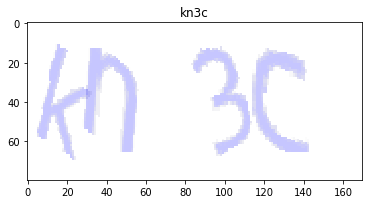

In [37]:
%matplotlib inline
from captcha.image import ImageCaptcha
import matplotlib.pyplot as plt
import numpy as np
import random
import string

characters = string.digits + string.ascii_lowercase
print(characters)

width, height, n_len, n_class = 170, 80, 4, len(characters)

generator = ImageCaptcha(width=width, height=height)
random_str = ''.join([random.choice(characters) for j in range(4)])
img = generator.create_captcha_image(random_str, (1, 1, 255), (255, 255, 255))
#img.save("generate.png")
#img.show()
plt.imshow(img)
plt.title(random_str)

In [54]:
from PIL import Image, ImageDraw, ImageFont
captcha = Image.new('RGB', (100, 20), 'white')
font = ImageFont.truetype('Lato-Black.ttf', 16)
draw = ImageDraw.Draw(captcha) # 字符繪製位置, 繪製的字符, 制定字體, 字符顏色
draw.text((0,0), 'hello world', font=font, fill='black')
captcha

In [43]:
import gym
env = gym.make('CartPole-v0')
env.reset()

array([-0.04566664, -0.04948561,  0.003929  , -0.04558941])

In [20]:
env.render()

True

In [59]:
env.step(env.action_space.sample())

(array([ 0.16655415,  1.14167984, -0.39557202, -2.41824082]), 0.0, True, {})

In [18]:
###  environment 只有四種 feature（小車位置，小車速度，柱子角度，柱尖速度），agent 只有兩種 action（向左移，向右移）
# 跑 200 個 episode，每個 episode 都是一次任務嘗試
for i_episode in range(10):
    observation = env.reset() # 讓 environment 重回初始狀態 
    rewards = 0 # 累計各 episode 的 reward 
    for t in range(250): # 設個時限，每個 episode 最多跑 250 個 action
        env.render() # 呈現 environment

        # Key section
        action = env.action_space.sample() # 在 environment 提供的 action 中隨機挑選
        observation, reward, done, info = env.step(action) # 進行 action，environment 返回該 action 的 reward 及前進下個 state

        rewards += reward # 累計 reward

        if done: # 任務結束返回 done = True
            print('Episode finished after {} timesteps, total rewards {}'.format(t+1, rewards))
            break

env.close()

Episode finished after 14 timesteps, total rewards 14.0
Episode finished after 12 timesteps, total rewards 12.0
Episode finished after 28 timesteps, total rewards 28.0
Episode finished after 29 timesteps, total rewards 29.0
Episode finished after 19 timesteps, total rewards 19.0
Episode finished after 57 timesteps, total rewards 57.0
Episode finished after 15 timesteps, total rewards 15.0
Episode finished after 16 timesteps, total rewards 16.0
Episode finished after 21 timesteps, total rewards 21.0
Episode finished after 35 timesteps, total rewards 35.0


In [96]:
env.

0

In [36]:
env

<TimeLimit<CartPoleEnv<CartPole-v0>>>

In [63]:
import math
import numpy as np

In [75]:
env = gym.make('CartPole-v0')

# 準備 Q table
## Environment 中各個 feature 的 bucket 分配數量
## 1 代表任何值皆表同一 state，也就是這個 feature 其實不重要
n_buckets = (1, 1, 6, 3)

## Action 數量 
n_actions = env.action_space.n

## State 範圍 
state_bounds = list(zip(env.observation_space.low, env.observation_space.high))
state_bounds[1] = [-0.5, 0.5]
state_bounds[3] = [-math.radians(50), math.radians(50)]

## Q table，每個 state-action pair 存一值 
q_table = np.zeros(n_buckets + (n_actions,))


In [77]:
q_table.shape

(1, 1, 6, 3, 2)

In [72]:
list(zip(env.observation_space.low, env.observation_space.high))

[(-4.8, 4.8),
 (-3.4028235e+38, 3.4028235e+38),
 (-0.41887903, 0.41887903),
 (-3.4028235e+38, 3.4028235e+38)]

In [76]:
state_bounds

[(-4.8, 4.8),
 [-0.5, 0.5],
 (-0.41887903, 0.41887903),
 [-0.8726646259971648, 0.8726646259971648]]

In [88]:
def get_state(observation, n_buckets, state_bounds):
    state = [0] * len(observation) 
    for i, s in enumerate(observation): # 每個 feature 有不同的分配
        l, u = state_bounds[i][0], state_bounds[i][1] # 每個 feature 值的範圍上下限
        if s <= l: # 低於下限，分配為 0
            state[i] = 0
        elif s >= u: # 高於上限，分配為最大值
            state[i] = n_buckets[i] - 1
        else: # 範圍內，依比例分配
            state[i] = int(((s - l) / (u - l)) * n_buckets[i])

    return tuple(state)


# 準備 Q table
## Environment 中各個 feature 的 bucket 分配數量
## 1 代表任何值皆表同一 state，也就是這個 feature 其實不重要
n_buckets = (1, 1, 6, 3)

## Action 數量 
n_actions = env.action_space.n

## State 範圍 
state_bounds = list(zip(env.observation_space.low, env.observation_space.high))
state_bounds[1] = [-0.5, 0.5]
state_bounds[3] = [-math.radians(50), math.radians(50)]

observation = env.reset()
state = get_state(observation, n_buckets, state_bounds) # 將連續值轉成離散 

state

(0, 0, 3, 1)

(0, 0, 2, 1)